In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

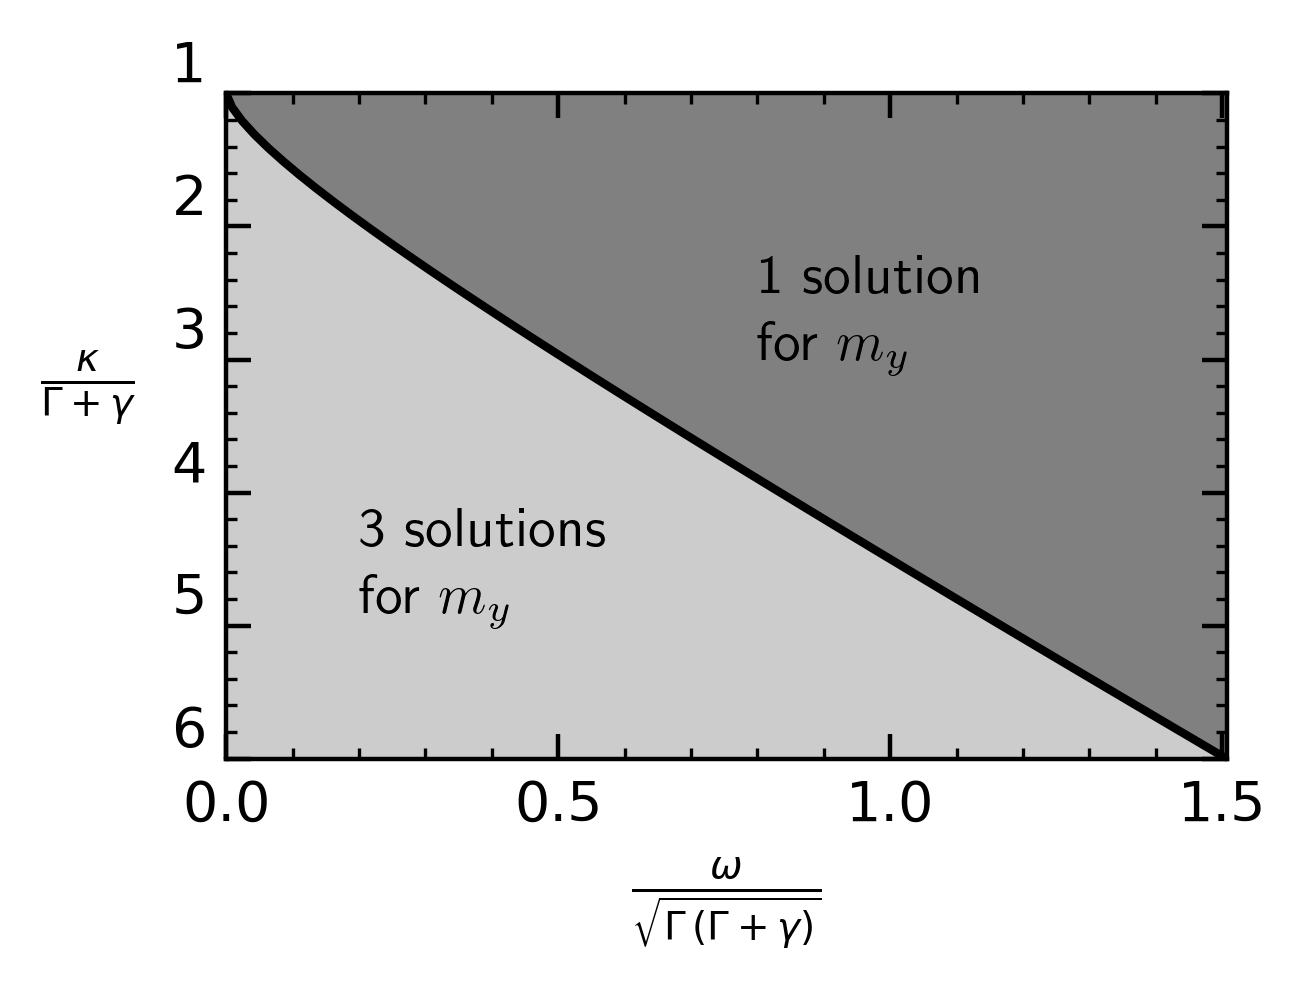

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import minimize, root_scalar
cm = 1/2.54  
width = 8*cm 
name_of_plot = "numb_fixp2.pdf"
major_xtick_step = 0.5
minor_xtick_step = 0.1
major_ytick_step = 1
minor_ytick_step = 0.2
STRIP_OF_ZEROS_X = False
STRIP_OF_ZEROS_Y = False
Gam = 1
sgam =0.2*Gam
def kappa_np(A,Gam,sgam,mp):
    res =Gam/2/A*(-1/np.sqrt(2)+mp*np.sqrt(1/2+4*A+4*A*sgam/Gam))
    if res>=0:
        return res
    else:
        return Gam/2/A*(-1/np.sqrt(2)+np.sqrt(1/2+4*A+4*A*sgam/Gam))
def func_B(w,A,Gam,sgam,mp):
    return 1/w**2*Gam/np.sqrt(2)*kappa_np(A,Gam,sgam,mp)
def ymax(w,a,G,gamma):
    k = kappa_np(a,G,gamma,-1)
    return (2+np.sqrt(1-3*k**2/w**2*a))/3
def ymaxx(w,k,G,gamma):
    return (2+np.sqrt(1-3*k**2/w**2*Ak(k,G,gamma)))/3

def testFunc(w,a,G,gamma):
    return 2*ymax(w,a,G,gamma)**3-2*ymax(w,a,G,gamma)**2
def w_boundary(w,a,Gam,sgam):
    return -func_B(w,a,Gam,sgam,-1)-testFunc(w,a,Gam,sgam)
def Ak(k,Gam,sgam):
    return Gam*(Gam+sgam-k/np.sqrt(2))/k**2

def bk(k,Gam,sgam):
    return 2*k**2*Ak(k,Gam,sgam)/(-1-np.sqrt(1+8*Ak(k,Gam,sgam)*(1+sgam/Gam)))
def maxFk(k,w,Gam,sgam):
    return bk(k,Gam,sgam)/w**2-2*ymaxx(w,k,Gam,sgam)**3+2*ymaxx(w,k,Gam,sgam)**2

def rootFw(w,k,Gam,sgam):
    return bk(k,Gam,sgam)/w**2-2*ymaxx(w,k,Gam,sgam)**3+2*ymaxx(w,k,Gam,sgam)**2
def BK(W,K):
    return K/2/W**2

def yKnax(W,K):
    return (2+np.sqrt(1-3/2*(1-K)/W**2))/3

def FKK(W,K):
    return -BK(W,K)+yKnax(W,K)**3*2-2*yKnax(W,K)**2


    

def fixy(y,x):
    return - x/2-(1-x/2)*y-y**3+2*y**2
def minx(x):
    return (2-np.sqrt(1+3/2*x))/3
def maxx(x):
    return (2+np.sqrt(1+3/2*x))/3

x = np.linspace(1,100)
yval=np.zeros((len(x),3))
for i in range(len(x)):
    rmin = root_scalar(fixy,args=(x[i]),method='brentq',bracket=(-200,minx(x[i])))
    rmid = root_scalar(fixy,args=(x[i]),method='brentq',bracket=(minx(x[i]),maxx(x[i])))
    rmax = root_scalar(fixy,args=(x[i]),method='brentq',bracket=(maxx(x[i]),400))
    yval[i,:] = rmin.root, rmid.root, rmax.root


k = np.linspace(1+1/10**3,6,50)
w = np.zeros_like(k)
for i in range(len(k)):
    # print(FKK(1/10**6,k[i]),FKK(10**5,k[i]))
    r = root_scalar(FKK,args=(k[i]),method='brentq',bracket=(1/10**6,10**5))
    w[i]=r.root
    # print(FKK(w[i],k[i]+0.1))

A = np.linspace(-1/(8*(1+sgam/Gam))+1/10**6,0-1/10**6,30)
w_b= np.zeros_like(A)
w0 = root_scalar(rootFw,args=(4/np.sqrt(2),Gam,sgam),method='brentq',bracket=(0.1,0.7))

# w = np.linspace(w0.root+5/10**2,2,30)
# mp=-1
# k= np.zeros_like(w)
# Fm = np.zeros_like(w)
# bm = np.zeros_like(w)
# for i in range(0,k.shape[0]):
#     # print(maxFk(4/np.sqrt(2),w[i],Gam,sgam),maxFk(10**5,w[i],Gam,sgam))
#     r= root_scalar(maxFk,args=(w[i],Gam,sgam),method='brentq',bracket=(4/np.sqrt(2),10**5))
#     # r = minimize(maxFk,x0=4,args=(w[i],Gam,sgam),bounds=[(4/np.sqrt(2),np.inf)])
#     k[i]= r.root
#     print(maxFk(k[i]+1/100,w[i],Gam,sgam))
#     # Fm[i] = r.fun
#     # bm[i] = 2*ymaxx(w[i],k[i],Gam,sgam)**3-2*ymaxx(w[i],k[i],Gam,sgam)**2
# # r = minimize(bk,args=(Gam,sgam),x0=5,bounds=[(4/np.sqrt(2),np.inf)])
# # print(r)
# ktest = np.linspace(0.2,3)
fig, ax = plt.subplots(1,1,layout='constrained',figsize=(width,4.8/6.4*width),dpi=400)

# ax.plot(ktest,bk(ktest,Gam,sgam),color="0")
ax.plot(w,k,color='0')
ax.fill_between(w,k[0],k,color='0.5')
ax.fill_between(w,k,k[-1],color='0.8')
# ax.plot(k,(k-2.3)/3.53)
# ax.plot(w,testFunc(w,Ak(r.x,Gam,sgam),Gam,sgam),color='0.5')
# ax.plot(w,4/3/w**2,color='0')
# ax.plot(w,Fm+bm)
# ax.hlines(y=-1/8,xmin=A[0],xmax=A[-1],color='0.5')
# ax[1].plot(A,H,color='0')
# ax.plot(A,-A,color='0.4')

# axlimits have to be adapted
ax.set_xlim(0,w[-1])
ax.set_ylim(1,k[-1])

# legend has to be adapted
# plt.legend([r"$(F'+B')(\omega)$",r"$B'(\omega)$"],loc='right',bbox_to_anchor=(1,0.75))
# plt.legend([r'\,\\border between\\1-solution- and\\3-solutions-area',r'$(\Gamma+\gamma)\,A=-\frac{1}{8}$'],loc='upper left',bbox_to_anchor=(0.01,0.99))
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# def strip0(x,pos):
#     if x<0: 
#         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
#     else:
#         if str(x).rstrip(".0"):
#             return str(x).rstrip(".0")
#     return "0"
def strip0(x,pos):
    if x==0:
        return "0"
    if x<-3/16/2: 
        return u'\u2212'+ '1/8' #str(x).rstrip(".0").lstrip("-")
    else:
        return u'\u2212'+ '1/16'
    #     if str(x).rstrip(".0"):
    #         return str(x).rstrip(".0")
    # return "0"
# yloc = ticker.MultipleLocator(base=2,offset=1)
# ax.yaxis.set_major_locator()
ax.yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax.xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
ax.yaxis.set_inverted(True)
if STRIP_OF_ZEROS_X:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(strip0))
if STRIP_OF_ZEROS_Y:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(strip0))  
ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax.tick_params(axis='both',which='major',length=4.5)
ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
ax.set_xlabel(r'$\frac{\omega}{\sqrt{\Gamma\,(\Gamma+\gamma)}}$')
ax.set_ylabel(r'$\frac{\kappa}{\Gamma+\gamma}$',rotation=0,labelpad=15)
plt.setp(ax.yaxis.get_majorticklabels(),va='bottom')
ax.text(0.8,2.5,r'\,\\1 solution\\for $m_y$')
ax.text(0.2,4.4,r'\,\\3 solutions\\for $m_y$')
# save figure
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+name_of_plot,bbox_inches='tight')
plt.show()


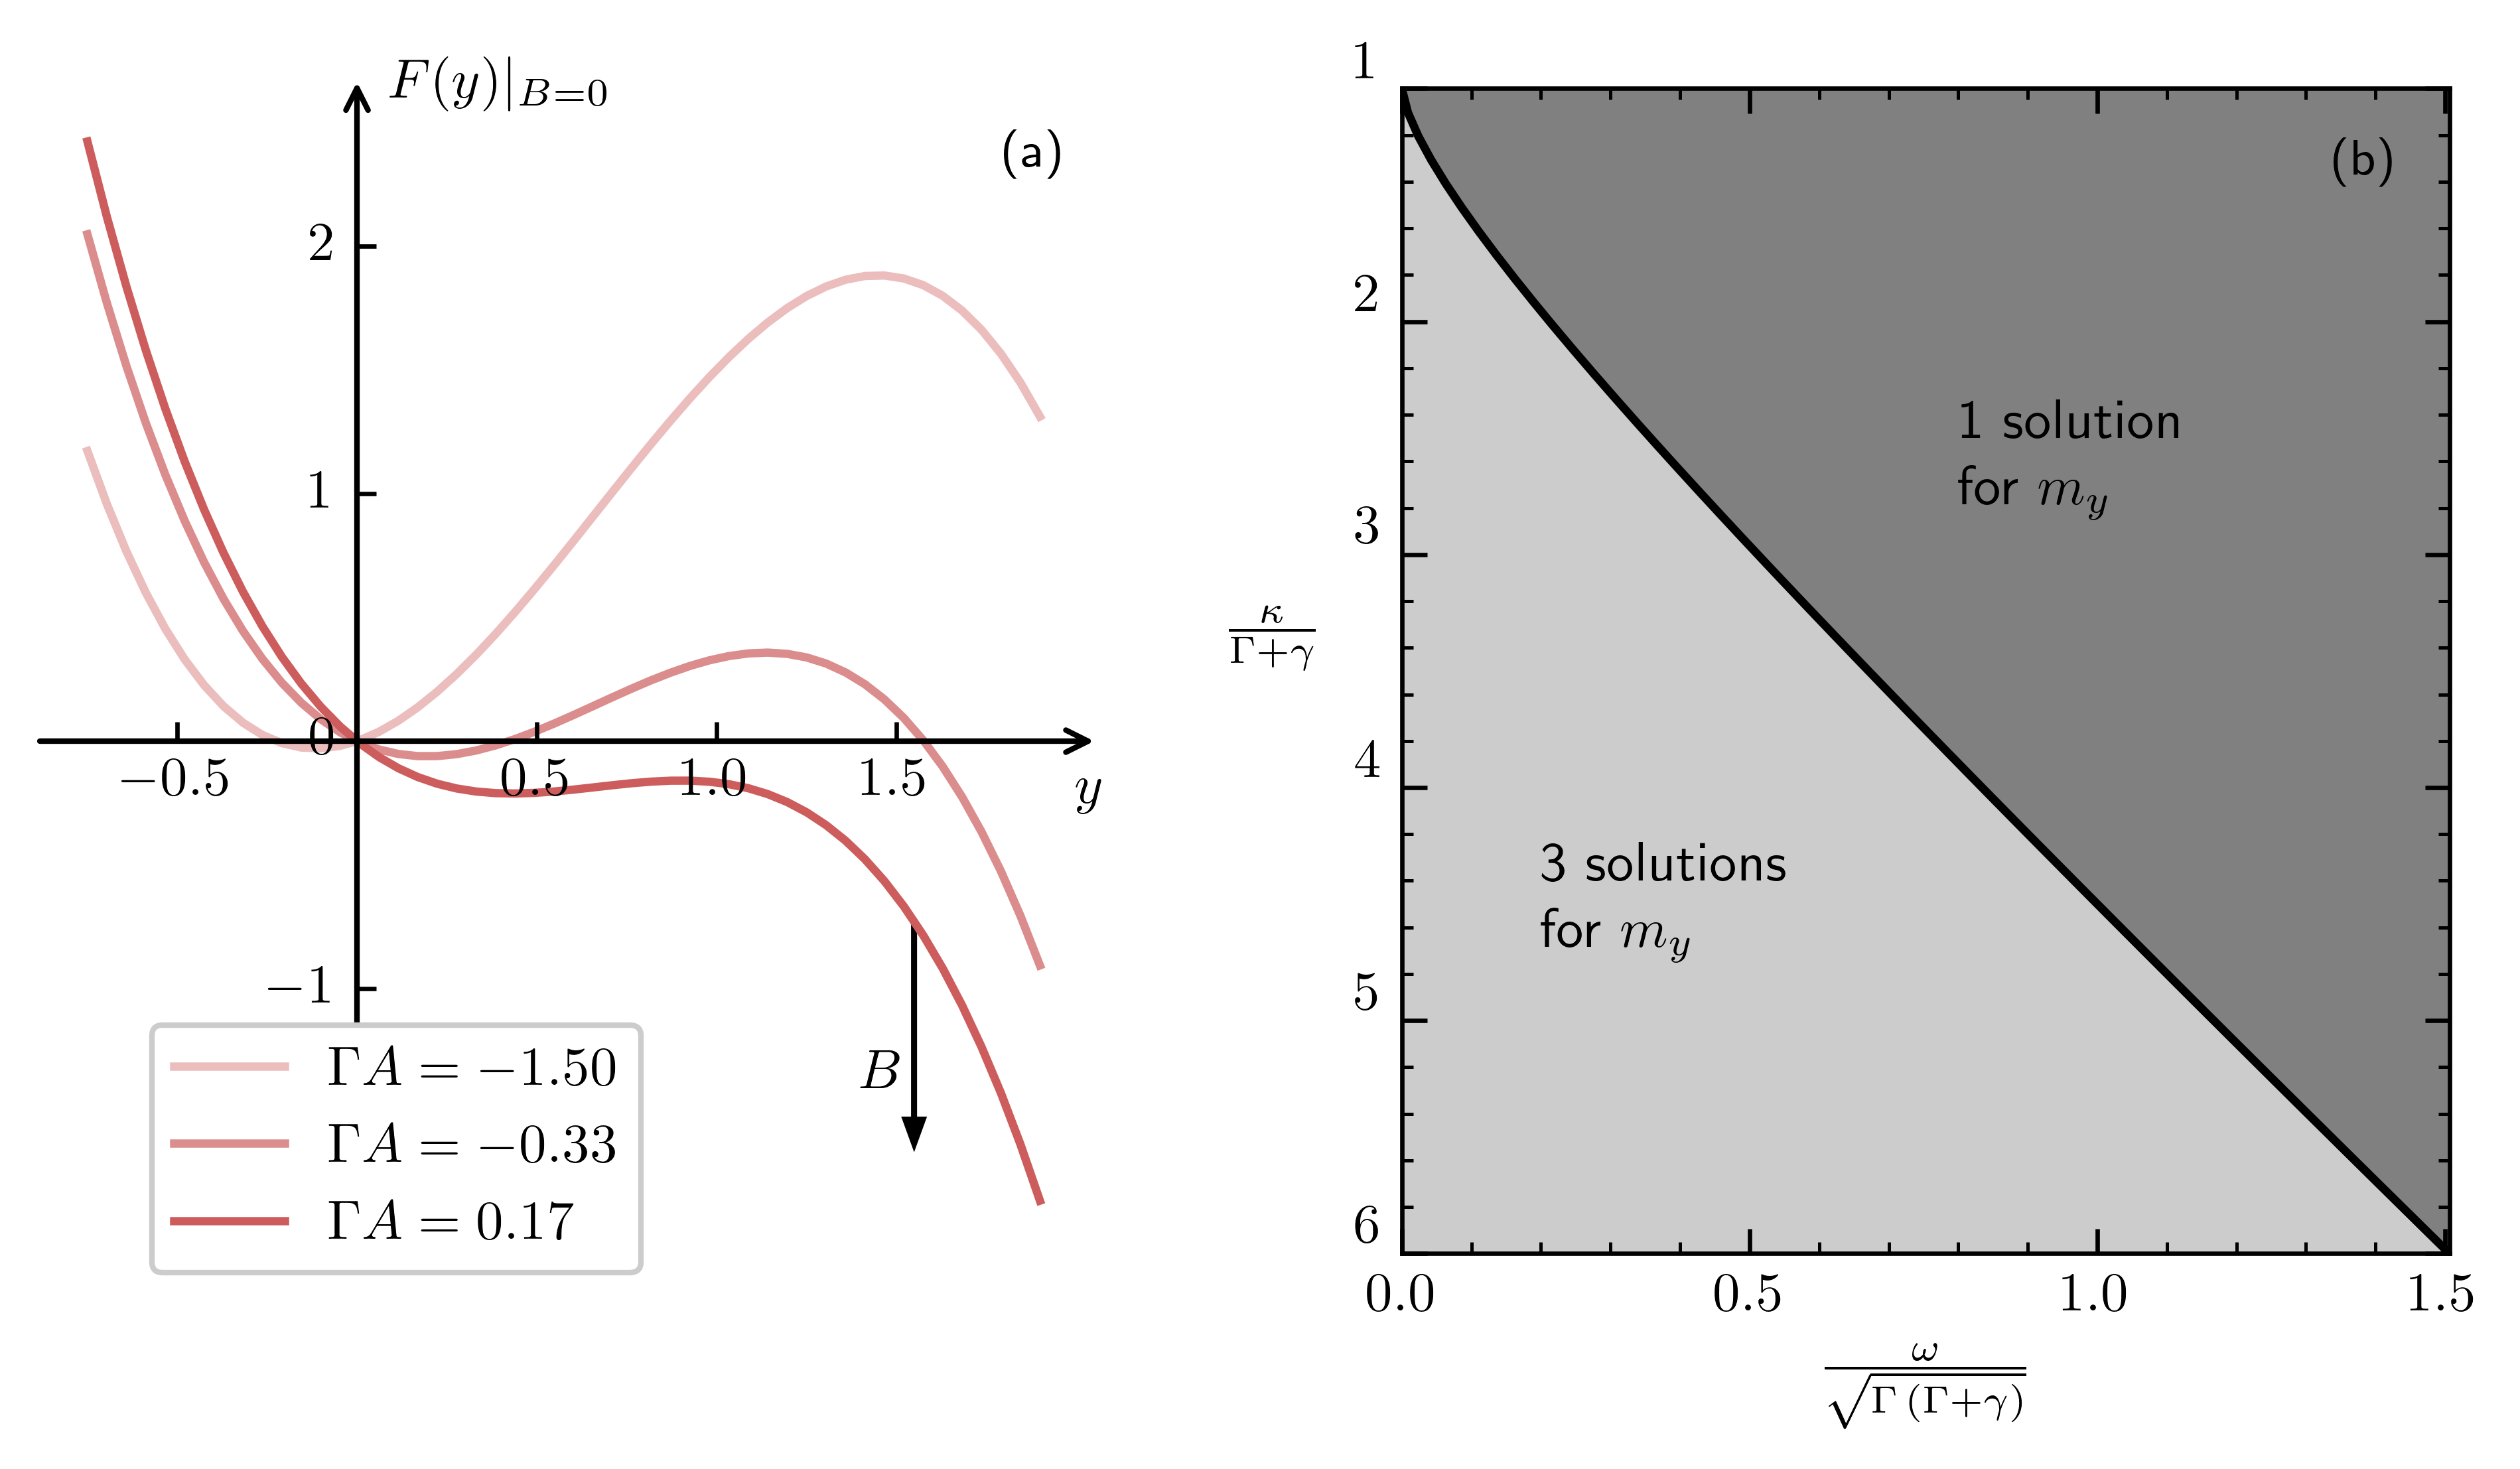

In [11]:
# polynomial scheme
# tickp = TickProperties(xtick_step_major=1,\

#                         xtick_step_minor=0.5,\
#                             ytick_step_major=1,\
#                                 ytick_step_minor=0.5)
# setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp)
from mpl_toolkits.axisartist.axislines import AxesZero
# setup.fig_width= 18*cm
# setup.fig_height=22.6*cm 
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(41*cm,6.3*cm),dpi=600)
gs = gridspec.GridSpec(1, 2, figure=fig,wspace=0.3,hspace=0.3,bottom=-0.3,right=0.5)
# fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600)
# del ax
ax = fig.add_subplot(gs[0],axes_class=AxesZero)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.tick_params(axis='x',which='both',bottom=True,top=False)
                    
ax.tick_params(axis='y',which='both',left=True,right=False)   
for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("->")
    # ax.axis.set(color='0')
    # ax.axis[direction].set_minor_locator(ticker.MultipleLocator(0.5))
    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)
ax.text(s=r'$F(y)|_{B=0}$',x=0.09,y=2.6)
ax.text(s=r'$y$',x=2,y=-0.25)
ax.set_xticks([-0.5,0.5,1,1.5])
def F_scale(y,A):
    return -(A + 1) *y -y**3 + 2 *y**2 
legend = []
yrange = np.linspace(-0.75,1.9)
As = [-1.5,-1/3,1/6]
alphas = [0.4,0.7,1]
for i in range(len(As)):
    ax.plot(yrange,F_scale(yrange,As[i]),color='indianred',alpha=alphas[i])
    legend.append(r'$\Gamma A='+r'{:.2f}$'.format(As[i]))
ax.legend(legend,bbox_to_anchor=(0.6,0.22),framealpha=1)
ax.arrow(x=1.55,y=F_scale(1.55,As[-1]),dx=0,dy=-0.8,head_width=0.05,head_length=0.1,facecolor='0')
ax.text(s=r'$B$',x=1.4,y=-1.4)
ax2 = fig.add_subplot(gs[1])
ax2.plot(w,k,color='0')
ax2.fill_between(w,k[0],k,color='0.5')
ax2.fill_between(w,k,k[-1],color='0.8')
ax2.set_xlim(0,w[-1])
ax2.set_ylim(1,k[-1])
ax2.yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
ax2.yaxis.set_inverted(True)
if STRIP_OF_ZEROS_X:
    ax2.xaxis.set_major_formatter(ticker.FuncFormatter(strip0))
if STRIP_OF_ZEROS_Y:
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(strip0))  
ax2.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax2.tick_params(axis='both',which='major',length=4.5)
ax2.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
ax2.set_xlabel(r'$\frac{\omega}{\sqrt{\Gamma\,(\Gamma+\gamma)}}$')
ax2.set_ylabel(r'$\frac{\kappa}{\Gamma+\gamma}$',rotation=0,labelpad=15)
plt.setp(ax2.yaxis.get_majorticklabels(),va='bottom')
ax2.text(0.8,2.5,r'\,\\1 solution\\for $m_y$')
ax2.text(0.2,4.4,r'\,\\3 solutions\\for $m_y$')
ax2.text(1.34,1.37,'(b)',fontsize=9)
ax.text(1.8,2.32,'(a)',fontsize=9)
plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+'polynomial_scheme_phase.pdf',bbox_inches='tight')
plt.show()

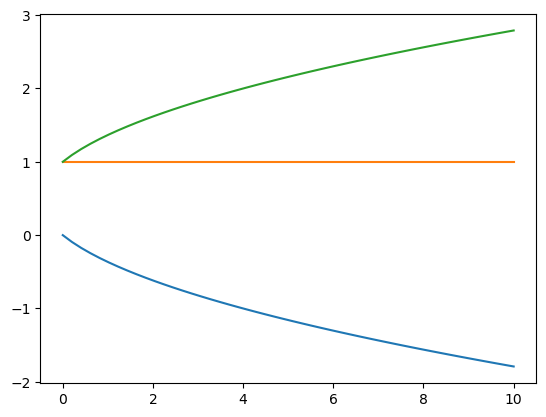

In [2]:
def fixy(y,x):
    return - x/2-(1-x/2)*y-y**3+2*y**2
def minx(x):
    return (2-np.sqrt(1+3/2*x))/3
def maxx(x):
    return (2+np.sqrt(1+3/2*x))/3

x = np.linspace(0,10)
yval=np.zeros((len(x),3))
for i in range(len(x)):
    rmin = root_scalar(fixy,args=(x[i]),method='brentq',bracket=(-200,minx(x[i])))
    rmid = root_scalar(fixy,args=(x[i]),method='brentq',bracket=(minx(x[i]),maxx(x[i])))
    rmax = root_scalar(fixy,args=(x[i]),method='brentq',bracket=(maxx(x[i]),400))
    yval[i,:] = rmin.root, rmid.root, rmax.root
plt.figure()
plt.plot(x,yval[:,0])
plt.plot(x,yval[:,1])
plt.plot(x,yval[:,2])
plt.show()

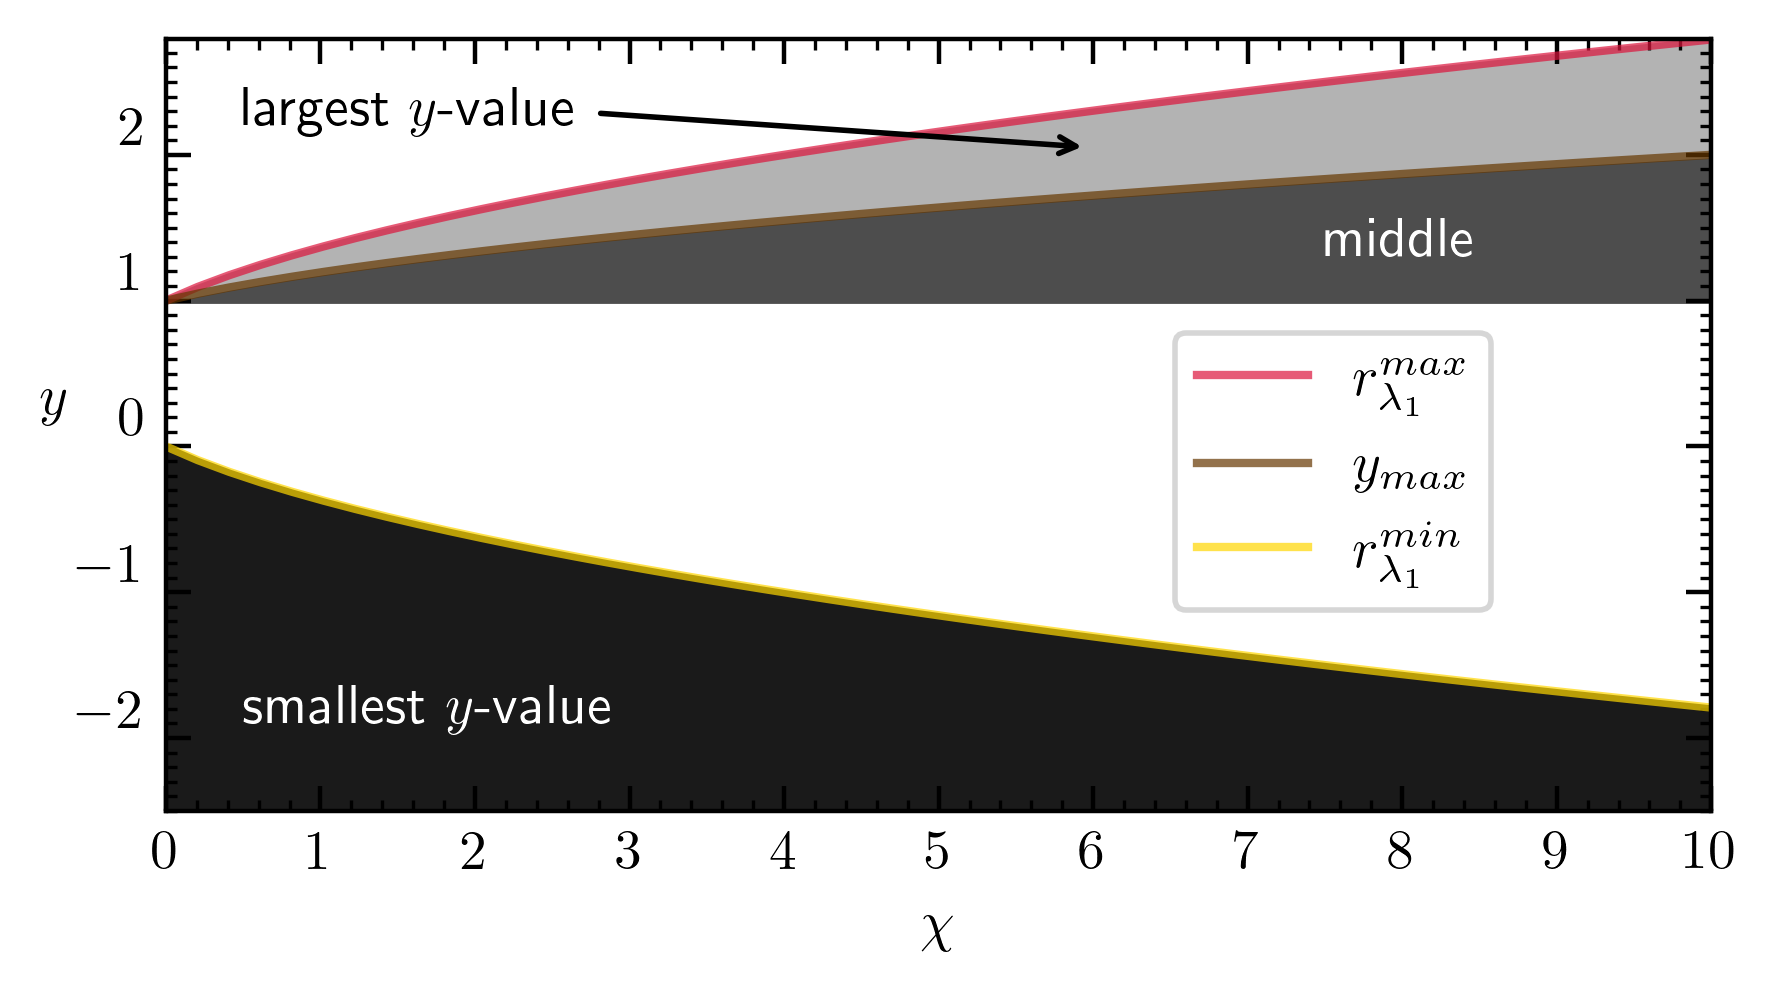

In [11]:
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import ArrowStyle
A = np.linspace(-5,0,30)
def func_B(a):
    if a<0:
        return -a #2*a/(-1-np.sqrt(1+8*a))
    else:
        return 0
root = []
conv = []
def minF(a):
    return (2-np.sqrt(1-3*a))/3
def maxF(a):
    return (2+np.sqrt(1-3*a))/3
# for a in A:
#     def func_y(y):
#         return -func_B(a)-(a+1)*y-y**3+2*y**2
#     r=root_scalar(func_y,bracket=[minF(a)-1/10**3,maxF(a)+1/10**3],x0=(maxF(a)+minF(a))/2)
#     conv.append(r.converged)
#     root.append(r.root)
# print(conv)

# root=np.array(root)
# print(root)
def root_lam1(x):
    return (1-np.sqrt(1+2*x))/2
def root_lam2(x):
    return (1+np.sqrt(1+2*x))/2
cm = 1/2.54  
width = 8*cm 
name_of_plot = "sign_of_ev1_streched.pdf"
major_xtick_step = 1
minor_xtick_step = 0.2
major_ytick_step = 1
minor_ytick_step = 0.1
STRIP_OF_ZEROS_X = False
STRIP_OF_ZEROS_Y = False
                                                                              
fig, ax = plt.subplots(1,1,layout='constrained',figsize=(11*cm,4.8/6.4*width),dpi=400)

# ax.scatter(A,root,color='0')
ax.plot(x,yval[:,2],color='#DC143C',alpha=0.7)
ax.plot(x,maxx(x),color='#653700',alpha=0.7)

# # ax.plot(x,root_lam1(x))
ax.plot(x,yval[:,0],color='#FFD700',alpha=0.7)
# ax.plot(x,yval[:,1],color='#6E750E')

ax.fill_between(x,-2.5,yval[:,0],color='0.1')
ax.fill_between(x,yval[:,1],maxx(x),color='0.3')
ax.fill_between(x,maxx(x),yval[:,2],color='0.7')
# axlimits have to be adapted
ax.set_xlim(x[0],x[-1])
ax.set_ylim(-2.5,max(yval[:,2]))

# legend has to be adapted
plt.legend([r'$r_{\lambda_1}^{max}$',r'$y_{max}$',r'$r_{\lambda_1}^{min}$'],loc='center left',bbox_to_anchor=(0.635,0.44))
# plt.legend([r'$r$',r'$r$',r'$y_{max}$'],loc='center left',bbox_to_anchor=(0.2,0.5))

plt.rcParams["lines.markersize"]=0.7
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# def strip0(x,pos):
#     if x<0: 
#         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
#     else:
#         if str(x).rstrip(".0"):
#             return str(x).rstrip(".0")
#     return "0"
def strip0(x,pos):
    if x==0:
        return "0"
    if x<-3/16/2: 
        return u'\u2212'+ '1/8' #str(x).rstrip(".0").lstrip("-")
    else:
        return u'\u2212'+ '1/16'
ax.yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax.xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
if STRIP_OF_ZEROS_X:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(strip0))
# if STRIP_OF_ZEROS_Y:
#     ax.yaxis.set_major_formatter(ticker.FuncFormatter(strip0))  
ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax.tick_params(axis='both',which='major',length=4.5)
ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
ax.set_xlabel(r'$\chi$')
ax.set_ylabel(r'$y$',rotation=0)
plt.setp(ax.yaxis.get_majorticklabels(),va='bottom')
ax.annotate(xy=(6,2.05),xytext=(0.5,2.2),text=r'largest $y$-value',arrowprops=dict(arrowstyle=ArrowStyle('->',head_length=0.3,head_width=0.15),facecolor='0',relpos=(1,0.5)))
ax.text(7.5,1.3,r'middle',color='1')
ax.text(0.5,-1.9,r'smallest $y$-value',color='1')
# save figure
plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+name_of_plot,bbox_inches='tight')

plt.show()


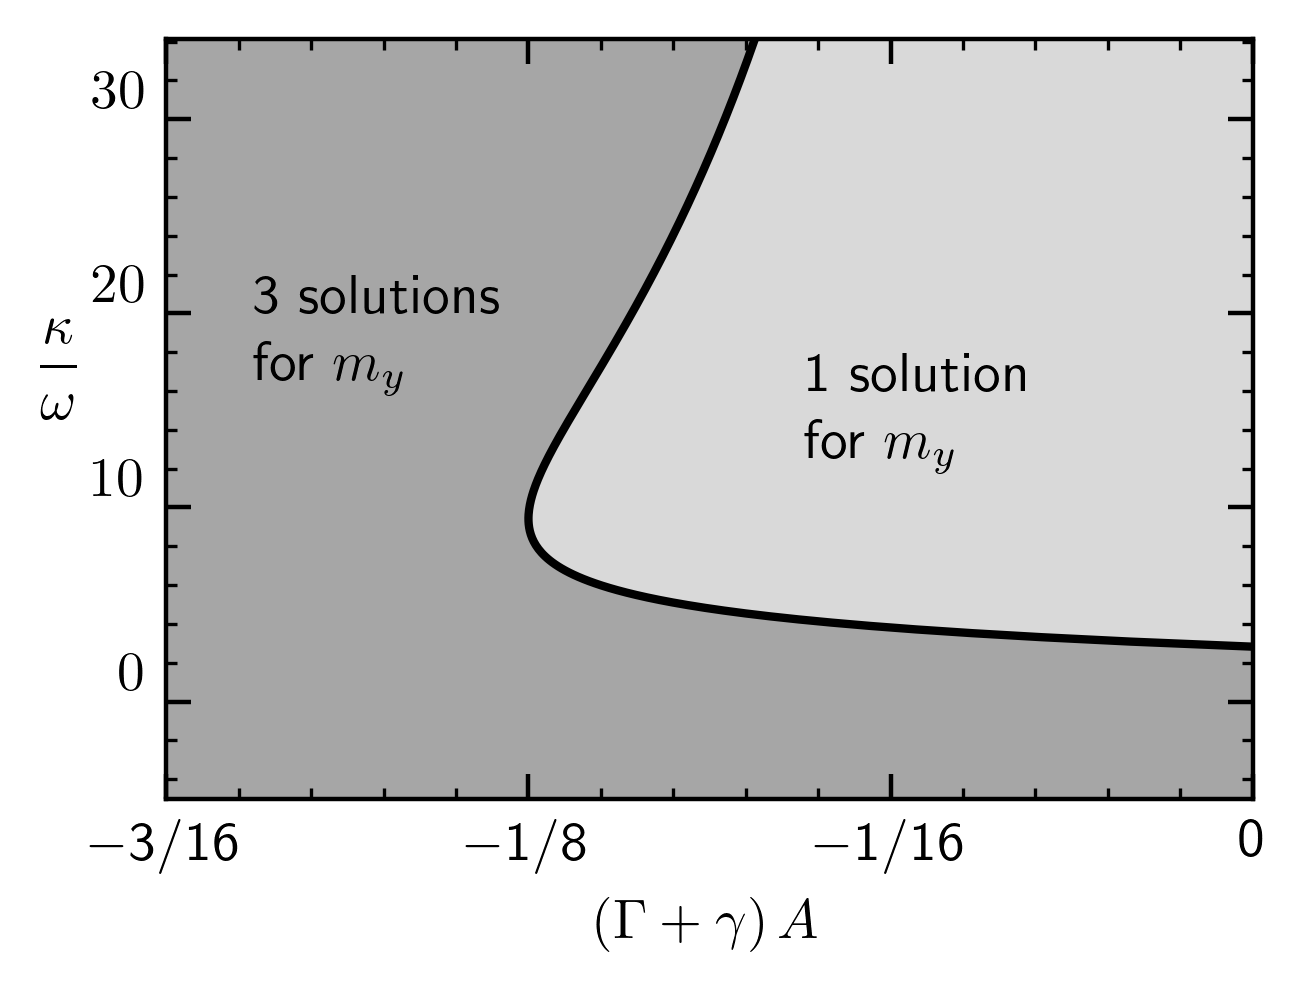

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cm = 1/2.54  
width = 8*cm 
name_of_plot = "phase_A_kw.pdf"
major_xtick_step = 1/16
minor_xtick_step = 0.05/4
major_ytick_step = 10
minor_ytick_step = 2
STRIP_OF_ZEROS_X = True
STRIP_OF_ZEROS_Y = False

A = np.linspace(-100,0-1/10**4,500)
# B = 2*A/(-1+np.sqrt(1+8*A))

y = (2+np.sqrt(1-3*A))/3
F = 2*y**3-2*y**2
G = ((2*A/F+1)**2-1)/8
H = 2*A/F+1
K = np.sqrt(A/G)

fig, ax = plt.subplots(1,1,layout='constrained',figsize=(width,4.8/6.4*width),dpi=400)

ax.plot(G,K,color='0')
C = np.concatenate((K,np.linspace(K[-1],-5)))
D = np.concatenate((G,np.linspace(0,0)))
ax.fill_betweenx(C,-3/2/8,D,color='0.65')#,alpha=0.7)
ax.fill_betweenx(K,G,0,color='0.85')#,alpha=0.3)
# ax.hlines(y=-1/8,xmin=A[0],xmax=A[-1],color='0.5')
# ax[1].plot(A,H,color='0')
# ax.plot(A,-A,color='0.4')
# print(np.arange(-60,A[-1]/G[-1],20))
# axlimits have to be adapted
ax.set_xlim(-3/2/8,0)
ax.set_ylim(-5,K[0])

# legend has to be adapted
# plt.legend([r"$(F'+B')(\Gamma \tilde{A})$",r"$B'(\Gamma \tilde{A})$"],loc='right',bbox_to_anchor=(1,0.66))
# plt.legend([r'\,\\border between\\1-solution- and\\3-solutions-area',r'$A=-\frac{1}{8}$'],loc='upper left',bbox_to_anchor=(0.01,0.99))
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# def strip0(x,pos):
#     if x<0: 
#         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
#     else:
#         if str(x).rstrip(".0"):
#             return str(x).rstrip(".0")
#     return "0"
def strip0(x,pos):
    if x==0:
        return "0"
    elif x<-3/16/2 and x>-3/16: 
        return u'\u2212'+ '1/8' #str(x).rstrip(".0").lstrip("-")
    elif x<-1/8:
        return u'\u2212'+ '3/16'
    else:
        return u'\u2212'+ '1/16'
    #     if str(x).rstrip(".0"):
    #         return str(x).rstrip(".0")
    # return "0"ax.yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax.xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
if STRIP_OF_ZEROS_X:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(strip0))
if STRIP_OF_ZEROS_Y:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(strip0))  
ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax.tick_params(axis='both',which='major',length=4.5)
ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
ax.set_xlabel(r'$(\Gamma+\gamma)\,A$')
ax.set_ylabel(r'$$\frac{\kappa}{\omega}$$',rotation=0,labelpad=6)
plt.setp(ax.yaxis.get_majorticklabels(),va='bottom')

ax.text(-3/16+1.5*1/100,20,r'\,\\3 solutions\\for $m_y$')
ax.text(-1/16-1.5*1/100,16,r'\,\\1 solution\\for $m_y$')

# save figure
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+name_of_plot,bbox_inches='tight')

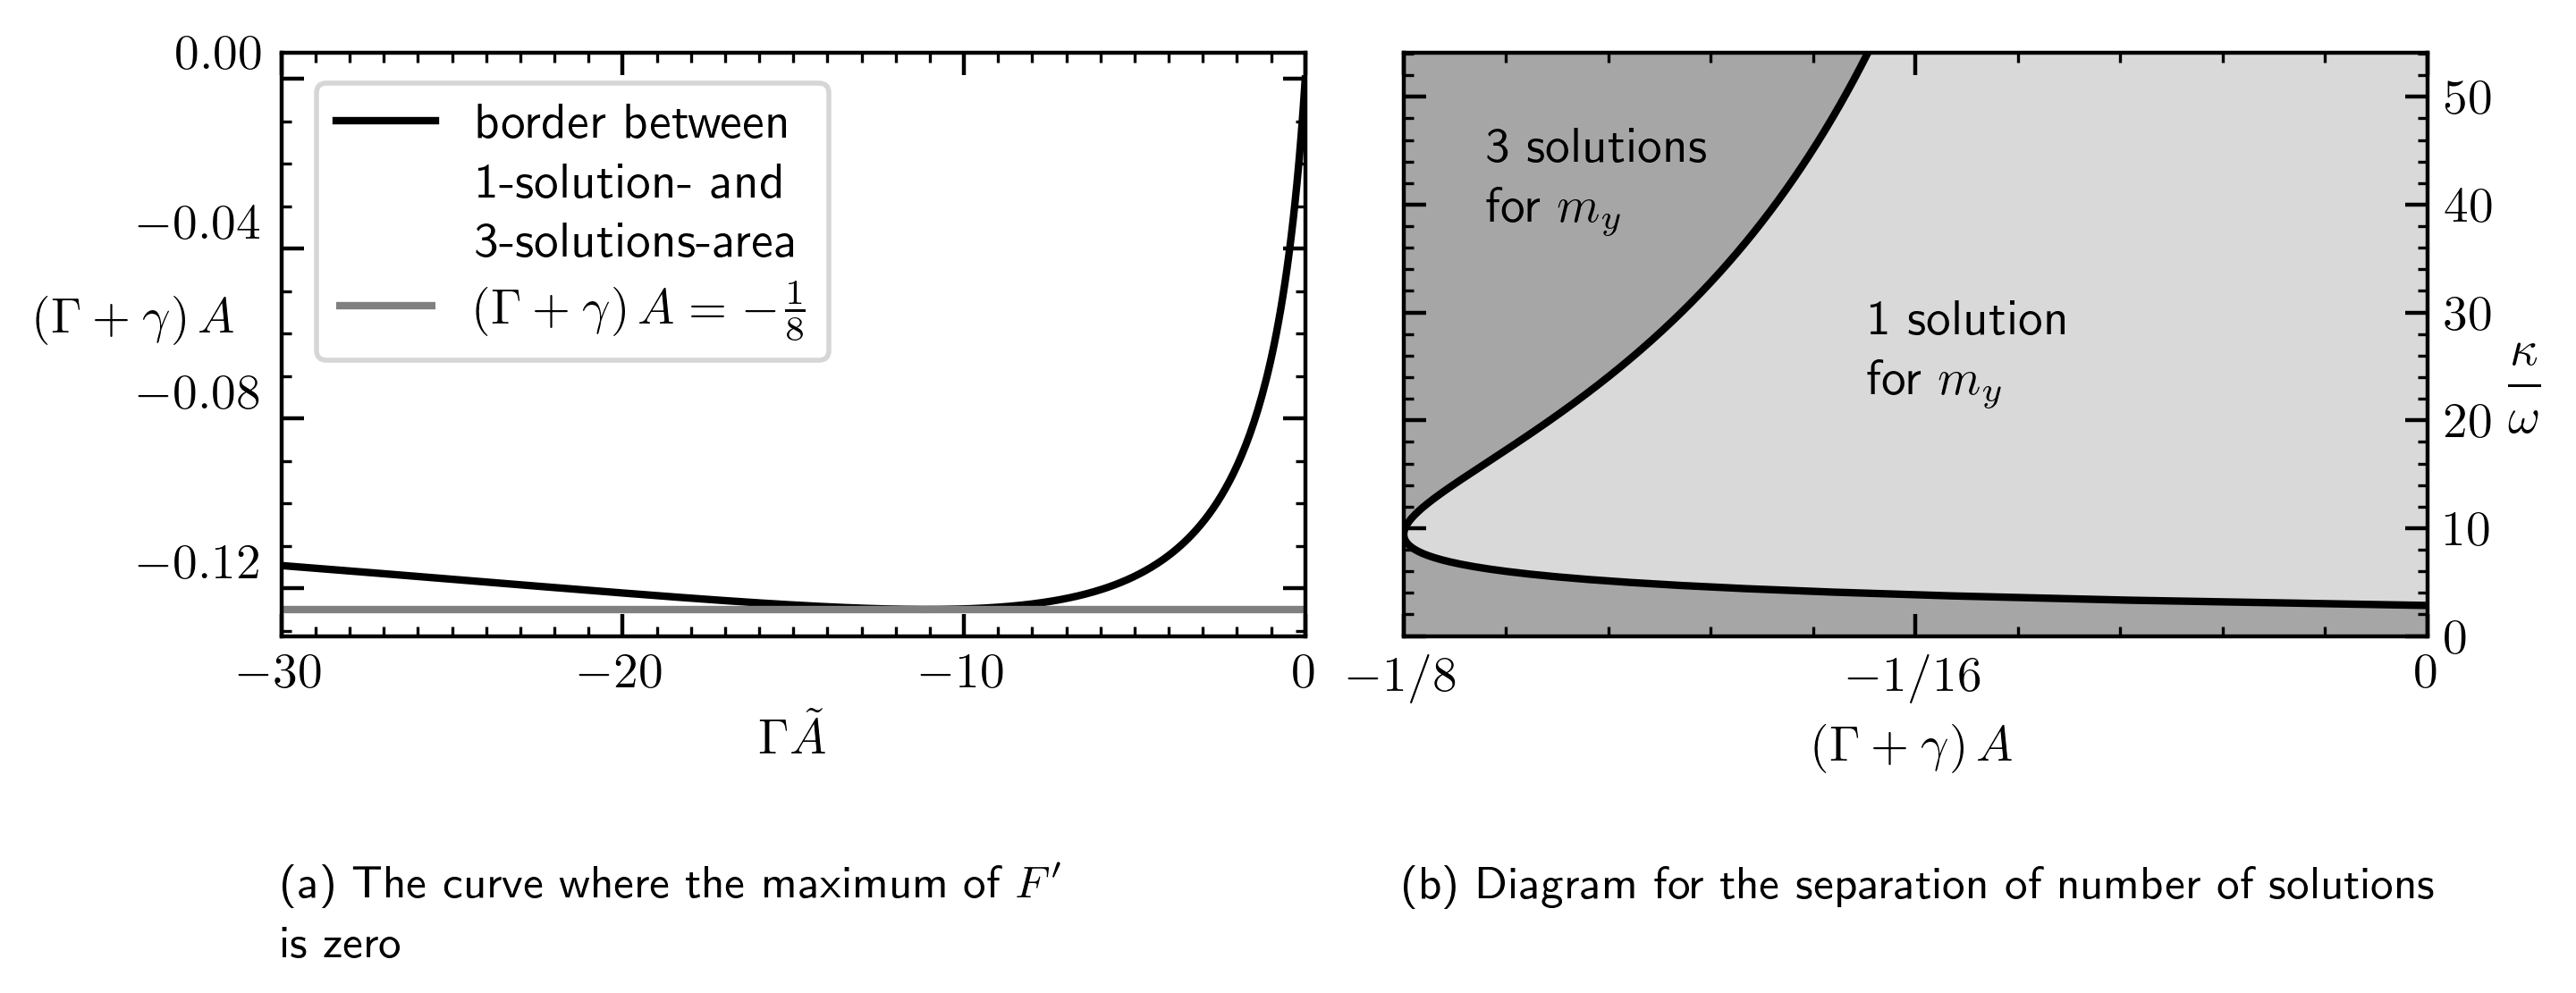

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cm = 1/2.54  
width = 9*cm 
name_of_plot = "phase_A_Atilde.pdf"
major_xtick_step = 10
minor_xtick_step = 1
major_ytick_step = 0.04
minor_ytick_step = 0.01
STRIP_OF_ZEROS_X = False
STRIP_OF_ZEROS_Y = False

A = np.linspace(-30+1/10**4,0-1/10**4,500)
# B = 2*A/(-1+np.sqrt(1+8*A))

y = (2+np.sqrt(1-3*A))/3
F = 2*y**3-2*y**2
G = ((2*A/F+1)**2-1)/8
H = 2*A/F+1
K = A/G

fig, ax = plt.subplots(1,2,layout='constrained',figsize=(2*width,4.8/6.4*width),dpi=400)

ax[0].plot(A,G,color='0')
ax[0].hlines(y=-1/8,xmin=A[0],xmax=A[-1],color='0.5')
# ax[0][1].plot(A,H,color='0')
# ax[0].plot(A,-A,color='0.4')

# ax[0]limits have to be adapted
ax[0].set_xlim(-30,0)
# ax[0].set_ylim(0,2)

# legend has to be adapted
# plt.legend([r"$(F'+B')(\Gamma \tilde{A})$",r"$B'(\Gamma \tilde{A})$"],loc='right',bbox_to_anchor=(1,0.66))
ax[0].legend([r'\,\\border between\\1-solution- and\\3-solutions-area',r'$(\Gamma+\gamma)\,A=-\frac{1}{8}$'],loc='upper left',bbox_to_anchor=(0.01,0.99))
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# def strip0(x,pos):
#     if x<0: 
#         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
#     else:
#         if str(x).rstrip(".0"):
#             return str(x).rstrip(".0")
#     return "0"
def strip0(x,pos):
    if x==0:
        return "0"
    if x<-3/16/2: 
        return u'\u2212'+ '1/8' #str(x).rstrip(".0").lstrip("-")
    else:
        return u'\u2212'+ '1/16'
    #     if str(x).rstrip(".0"):
    #         return str(x).rstrip(".0")
    # return "0"
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
if STRIP_OF_ZEROS_X:
    ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(strip0))
if STRIP_OF_ZEROS_Y:
    ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(strip0))  
ax[0].tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax[0].tick_params(axis='both',which='major',length=4.5)
ax[0].tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
ax[0].set_xlabel(r'$\Gamma \tilde{A}$')
ax[0].set_ylabel(r'$(\Gamma+\gamma)\,A$',rotation=0,labelpad=0)
plt.setp(ax[0].yaxis.get_majorticklabels(),va='bottom')
ax[0].set_title(r"\,\\(a) The curve where the maximum of $F'$\\is zero",loc='left',y=-0.5,fontsize=9)



name_of_plot = "phaseplot_A_kw.pdf"
major_xtick_step = 1/16
minor_xtick_step = 0.05/4
major_ytick_step = 10
minor_ytick_step = 2
STRIP_OF_ZEROS_X = True
STRIP_OF_ZEROS_Y = False

A = np.linspace(-200,0-1/10**4,500)
# B = 2*A/(-1+np.sqrt(1+8*A))

y = (2+np.sqrt(1-3*A))/3
F = 2*y**3-2*y**2
G = ((2*A/F+1)**2-1)/8
H = 2*A/F+1
K = np.sqrt(A/G)


ax[1].plot(G,K,color='0')
C = np.concatenate((K,np.linspace(K[-1],0)))
D = np.concatenate((G,np.linspace(0,0)))
ax[1].fill_betweenx(C,-1/8,D,color='0.65')#,alpha=0.7)
ax[1].fill_betweenx(K,G,0,color='0.85')#,alpha=0.3)
# ax[1].hlines(y=-1/8,xmin=A[0],xmax=A[-1],color='0.5')
# ax[1][1].plot(A,H,color='0')
# ax[1].plot(A,-A,color='0.4')
# print(np.arange(-60,A[-1]/G[-1],20))
# axlimits have to be adapted
ax[1].set_xlim(-1/8,0)
ax[1].set_ylim(0,K[0])

# legend has to be adapted
# plt.legend([r"$(F'+B')(\Gamma \tilde{A})$",r"$B'(\Gamma \tilde{A})$"],loc='right',bbox_to_anchor=(1,0.66))
# plt.legend([r'\,\\border between\\1-solution- and\\3-solutions-area',r'$A=-\frac{1}{8}$'],loc='upper left',bbox_to_anchor=(0.01,0.99))
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# def strip0(x,pos):
#     if x<0: 
#         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
#     else:
#         if str(x).rstrip(".0"):
#             return str(x).rstrip(".0")
#     return "0"
def strip0(x,pos):
    if x==0:
        return r'$0$'
    elif x<-3/16/2 and x>-3/16: 
        return r'$-1/8$' #u'\u2212'+ '1/8' #str(x).rstrip(".0").lstrip("-")
    elif x<-1/8:
        return r'$-3/16$' #u'\u2212'+ '3/16'
    else:
        return r'$-1/16$' #u'\u2212'+ '1/16'
    #     if str(x).rstrip(".0"):
    #         return str(x).rstrip(".0")
    # return "0"ax[1].yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
if STRIP_OF_ZEROS_X:
    ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(strip0))
if STRIP_OF_ZEROS_Y:
    ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(strip0))  
ax[1].tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax[1].tick_params(axis='both',which='major',length=4.5)
ax[1].tick_params(axis='y',direction='in',which='both',left=True,right=True,labelright=True,labelleft=False)
ax[1].set_xlabel(r'$(\Gamma+\gamma)\,A$')
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel(r'$$\frac{\kappa}{\omega}$$',rotation=0,labelpad=6)
plt.setp(ax[1].xaxis.get_majorticklabels(),ha='center')


ax[1].text(-1/8+1/100,44,r'\,\\3 solutions\\for $m_y$')
ax[1].text(-1/16-0.6*1/100,28,r'\,\\1 solution\\for $m_y$')
ax[1].set_title('(b) Diagram for the separation of number of solutions',loc='left',y=-0.5,fontsize=9)
# plt.subplots_adjust(wspace=0)

# save figure
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+name_of_plot,bbox_inches='tight')

# save figure
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+name_of_plot,bbox_inches='tight')